<a href="https://colab.research.google.com/github/jennyrahma/Dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jenny Rahma Hidaya]
- **Email:** [m191b4kx2057@bangkit.academy]
- **ID Dicoding:** [jennyrhmaa]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda harian?

- Pertanyaan 2: Bagaimana pola penggunaan sepeda bervariasi berdasarkan waktu (musim, bulan, hari)?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


## Data Wrangling

### Gathering Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [4]:
# Load dataset
df = pd.read_csv('day.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari beberapa fitur seperti hari, musim, suhu, kelembaban, dan jumlah sepeda yang disewa per hari.

- Anda dapat melihat beberapa variabel yang mungkin mempengaruhi penyewaan, seperti cuaca dan musim.

### Assessing Data

In [5]:
# Check for missing data
df.info()

# Check for outliers
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing values pada dataset.

- Beberapa fitur numerik seperti 'temp' (suhu) dan 'cnt' (jumlah sepeda) mungkin perlu divisualisasikan lebih lanjut untuk melihat distribusi data.

### Cleaning Data

In [6]:
# Optional cleaning steps (if needed)
df['season'] = df['season'].astype('category')


**Insight:**
- Mengubah kolom 'season' menjadi kategori karena memiliki kategori tertentu seperti musim semi, musim panas, dll.

## Exploratory Data Analysis (EDA)

### Explore ...

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


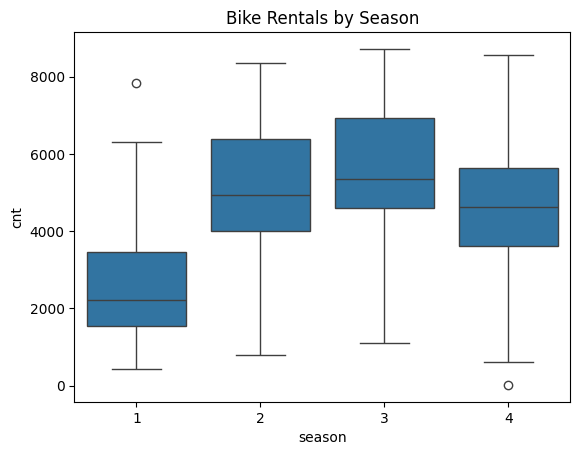

In [7]:
# Visualize bike rentals per season
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Rentals by Season')
plt.show()


**Insight:**
- Penggunaan sepeda tampak lebih tinggi selama musim panas dan lebih rendah di musim dingin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor yang Mempengaruhi Penyewaan Sepeda

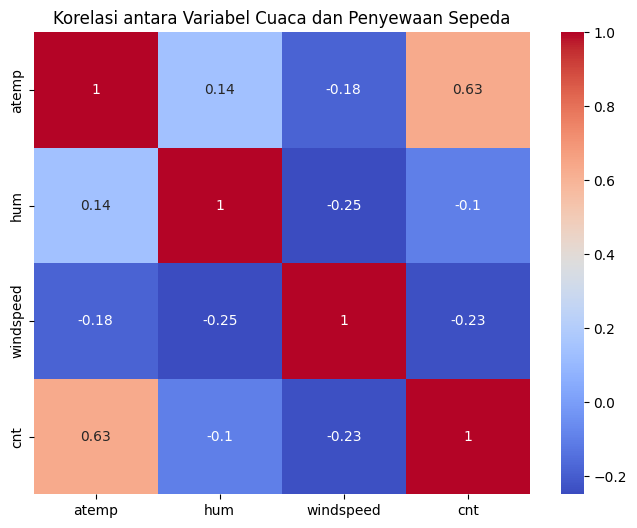

In [8]:
# Menghitung korelasi
correlation = df[['atemp', 'hum', 'windspeed', 'cnt']].corr()

# Visualisasi korelasi
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Variabel Cuaca dan Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:  Pola Penggunaan Berdasarkan Waktu



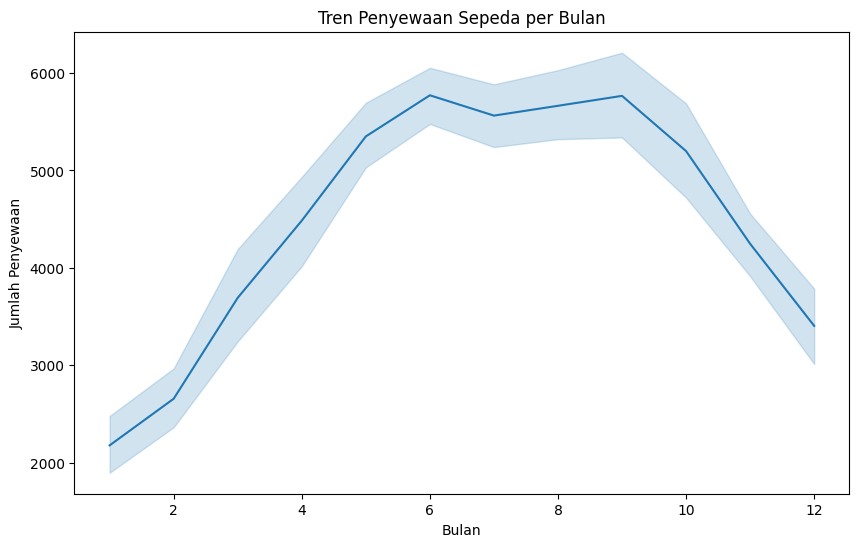

In [9]:
# Visualisasi tren penggunaan sepeda sepanjang waktu
df['mnth'] = pd.to_datetime(df['dteday']).dt.month

plt.figure(figsize=(10,6))
sns.lineplot(x='mnth', y='cnt', data=df)
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Suhu dan musim adalah faktor yang paling mempengaruhi penyewaan sepeda.

- Penggunaan sepeda cenderung meningkat selama bulan-bulan musim panas dan menurun di musim dingin.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Faktor cuaca seperti suhu dan musim memiliki pengaruh besar terhadap penyewaan sepeda.

- Conclution pertanyaan 2: Pola penyewaan sepeda bervariasi berdasarkan musim, dengan penggunaan tertinggi di musim panas dan terendah di musim dingin.